In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [52]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [53]:
X_train.shape

(50000, 32, 32, 3)

In [54]:
X_test.shape

(10000, 32, 32, 3)

In [55]:
y_train.shape

(50000, 1)

In [56]:
y_test.shape

(10000, 1)

[1]


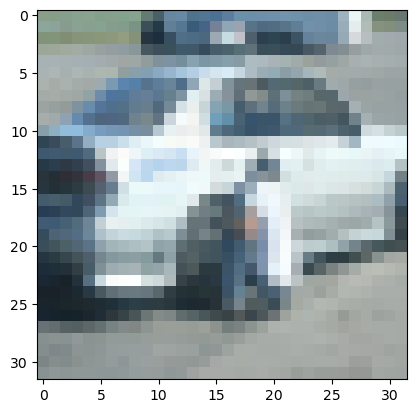

In [57]:
i = 30009
plt.imshow(X_train[i])
print(y_train[i])

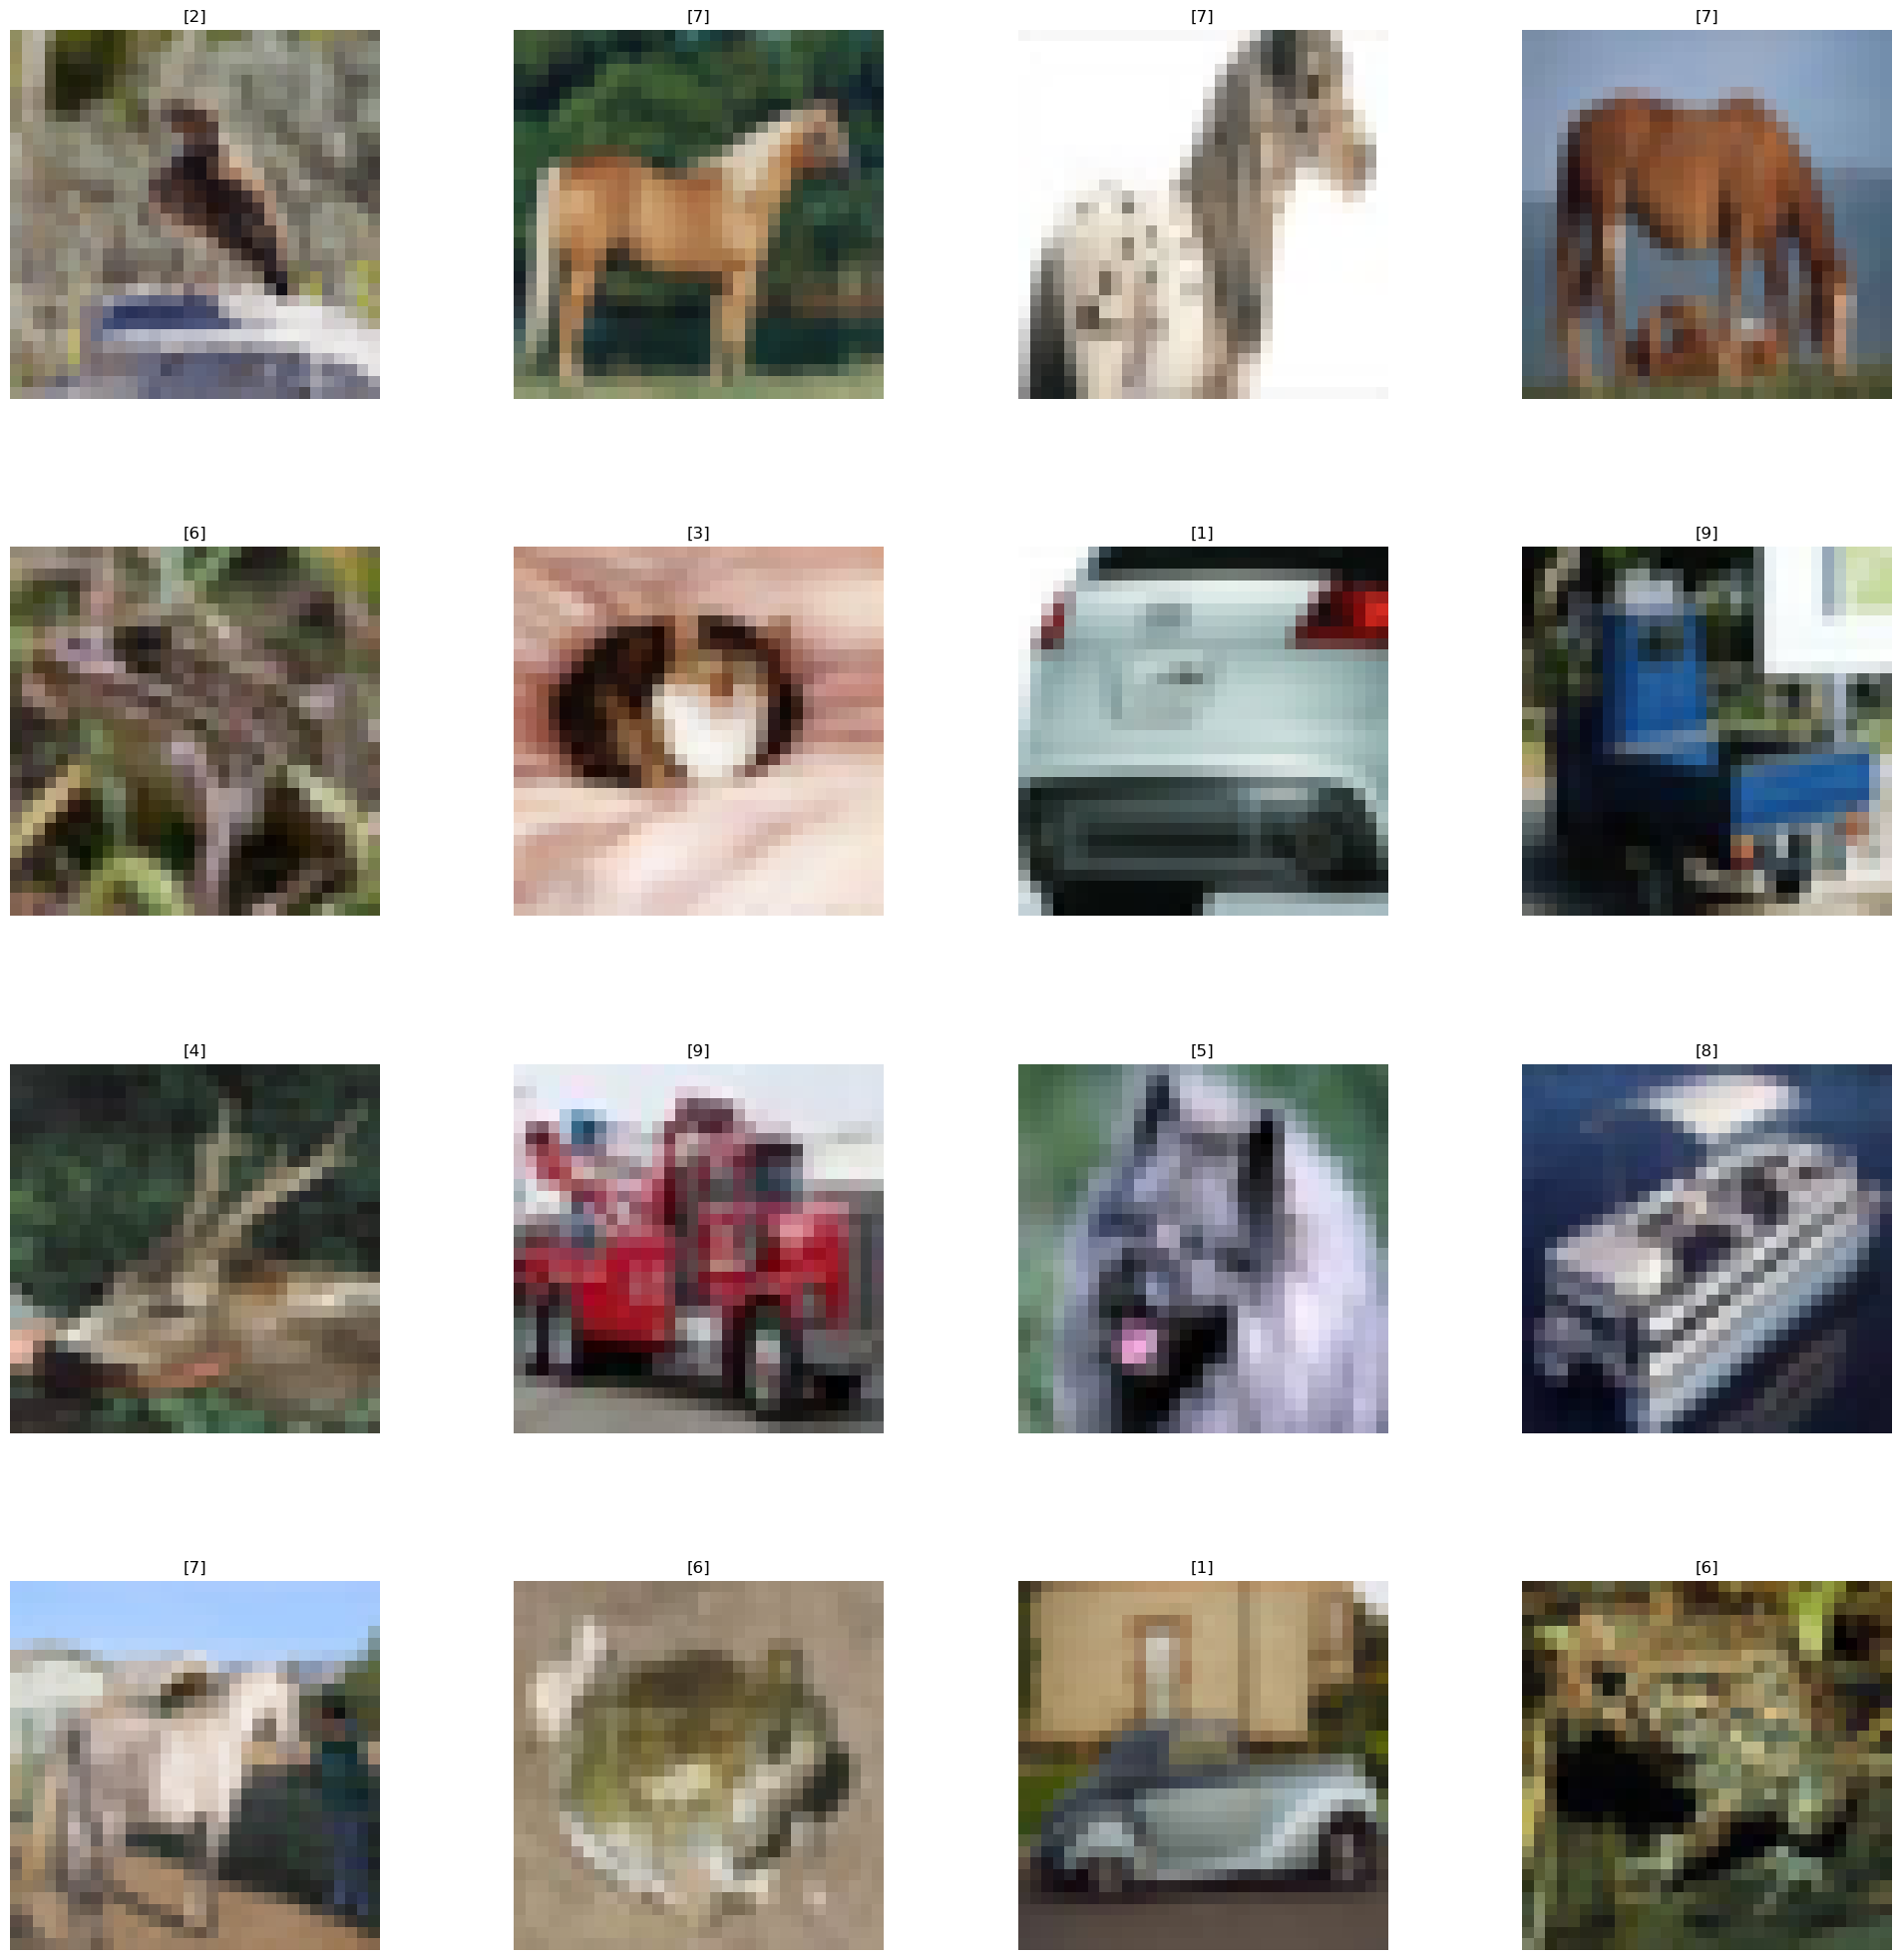

In [58]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [59]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [60]:
number_cat = 10

In [61]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [62]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [63]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
X_train = X_train/255
X_test = X_test/255

In [65]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [66]:
X_train.shape

(50000, 32, 32, 3)

In [67]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [68]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard

In [69]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [70]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])


In [71]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)


1563/1563 [==============================] - 325s 207ms/step - loss: 1.6091 - accuracy: 0.4225


In [72]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)


Epoch 1/2
1563/1563 [==============================] - 292s 187ms/step - loss: 1.2310 - accuracy: 0.5760
Epoch 2/2
1563/1563 [==============================] - 302s 193ms/step - loss: 1.1300 - accuracy: 0.6137


In [73]:
evaluation = cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 18s 57ms/step - loss: 1.2768 - accuracy: 0.5605


In [75]:
print('Test Accuracy: {}'.format(evaluation[1]))

Test Accuracy: 0.5605000257492065


In [84]:
predicted_classes = (cnn_model.predict(X_test) > 0.5).astype("int64")


313/313 [==============================] - 17s 54ms/step


In [85]:
predicted_classes[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [86]:
classes_x=np.argmax(predicted_classes,axis=1).astype("int32")


In [87]:
classes_x

array([6, 1, 0, ..., 0, 4, 7], dtype=int32)

In [88]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

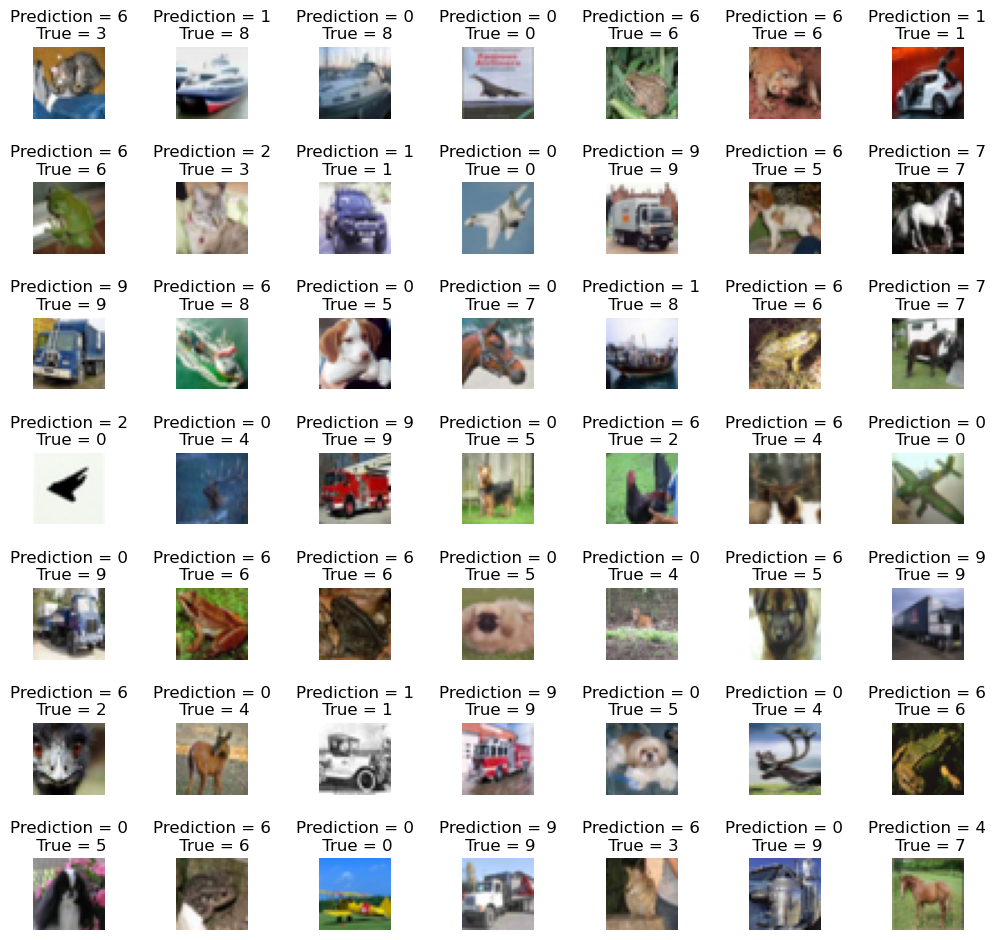

In [90]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(classes_x[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1) 

<Axes: >

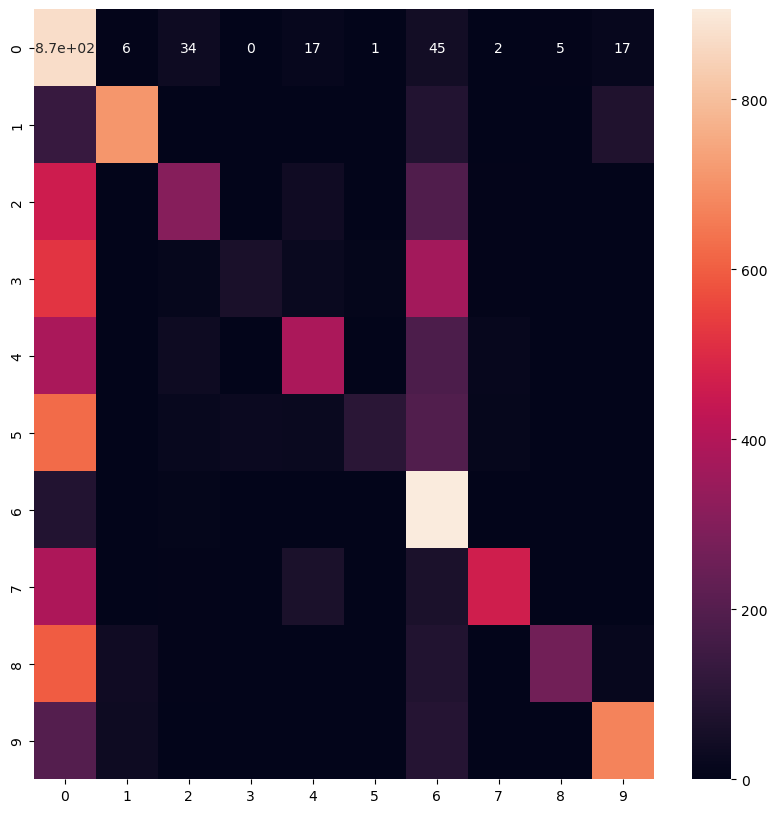

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, classes_x)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)